In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DAta Collection and Processing

In [ ]:
#loading the csv data to Pandas DataFrame
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
#getting basic info on the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
#getting stastical measures
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#Coorelation
 #   |
  # /     \
#Postive  Negative

In [ ]:
correlation = gold_data.drop('Date', axis=1).corr()

<Axes: >

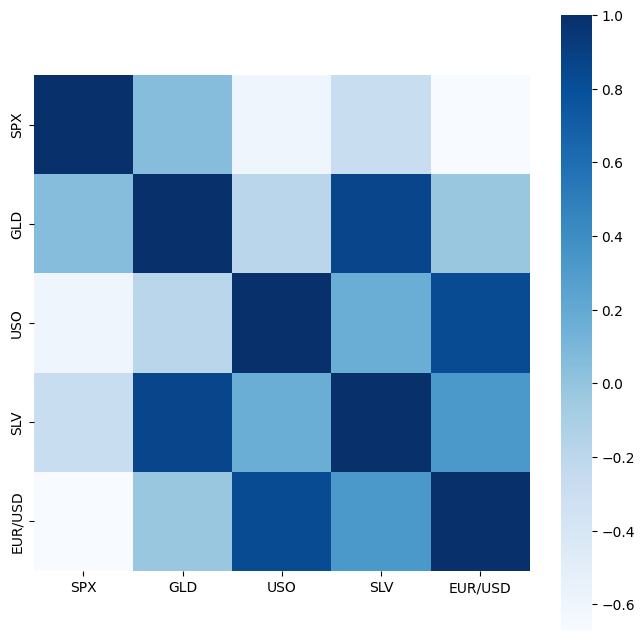

In [ ]:
#constructing heatmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')

In [ ]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-3945353434.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

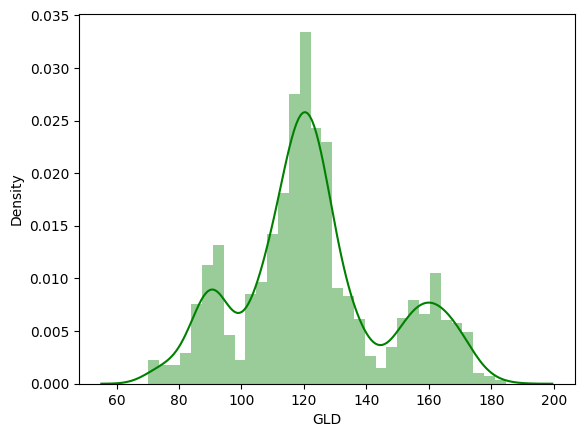

In [ ]:
#check distribution of glod price
sns.distplot(gold_data['GLD'],color='green')

Splitting Features and Target

In [ ]:
X=gold_data.drop(['Date','GLD'],axis = 1) #drop - to delete a row 1-column,0-row
Y=gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Train and Test Data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Training Model :RandonForestRegressor


In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
#TRaiing The Model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
#Prediction on Test DAta
test_data_prediction=regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.64059953  82.26759971 116.26940009 127.54810055 120.69390114
 154.60579818 150.38049905 125.98310033 117.37189871 126.21330015
 116.74700074 172.43950103 141.66239771 167.90479867 115.19649999
 117.33520033 138.3277028  170.06240072 159.35990233 159.62049947
 155.14950051 125.06650044 175.19450005 157.93740313 125.20800016
  93.80399955  77.85340001 120.77960002 119.12739964 167.42940048
  88.03490071 125.16250024  91.19020075 117.7097004  121.18129976
 136.11120109 115.36710145 115.34680095 147.60689956 107.15690097
 104.3094024   87.0095977  126.64130035 117.94959998 153.67829882
 119.75640009 108.35099959 108.08969819  93.1474006  127.17409746
  74.74310041 113.66449939 121.45629986 111.25009891 118.73369891
 120.50229935 159.83620004 168.62640045 147.02119687  85.86169841
  94.59120031  86.82559847  90.60350017 119.0033005  126.44740097
 127.58370044 168.69970028 122.17379903 117.24789899  98.19160068
 167.500201   142.77959799 131.80460257 121.25630227 120.59469919
 119.74150

In [ ]:
# R square error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.9885290889218188


##Compare the Actual VAlues and Predicted Values in a PLot


In [ ]:
Y_test = list(Y_test)

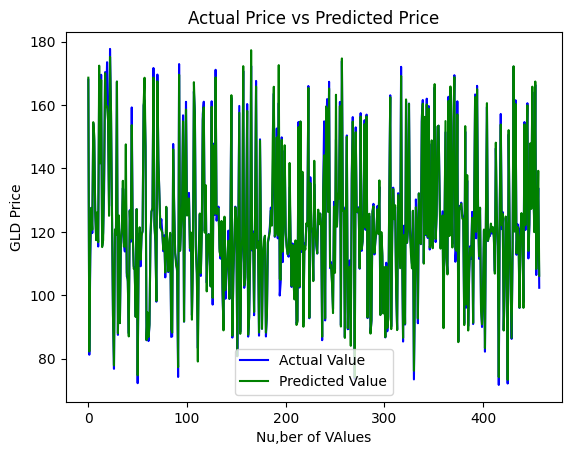

In [ ]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Nu,ber of VAlues')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
# ^^^
# |||

# This above graph shows that the predicted values of the model are quite close to the actual values of the data